In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# CAB TABLE DATA

In [2]:
cab=pd.read_csv('Cab_Data.csv')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
Transaction ID    1998 non-null int64
Date of Travel    1998 non-null int64
Company           1998 non-null object
City              1998 non-null object
KM Travelled      1998 non-null float64
Price Charged     1998 non-null float64
Cost of Trip      1998 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 109.3+ KB


In [4]:
cab.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
1993,10002603,42386,Yellow Cab,WASHINGTON DC,36.63,581.27,509.8896
1994,10002604,42378,Yellow Cab,WASHINGTON DC,45.24,750.50,570.0240
1995,10002605,42379,Yellow Cab,WASHINGTON DC,17.92,302.97,247.2960
1996,10002606,42382,Yellow Cab,WASHINGTON DC,19.04,259.78,242.1888
1997,10002607,42385,Yellow Cab,WASHINGTON DC,10.62,159.07,149.1048


checking the size of the column names of the cab table

In [5]:
cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

Looking at the Size of the table

In [6]:
cab.shape

(1998, 7)

Checking the variable types

In [7]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
Transaction ID    1998 non-null int64
Date of Travel    1998 non-null int64
Company           1998 non-null object
City              1998 non-null object
KM Travelled      1998 non-null float64
Price Charged     1998 non-null float64
Cost of Trip      1998 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 109.3+ KB


In [89]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] #Categorical Variable

dfc

['Gender', 'Payment_Mode']

In [90]:
dfn= [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
dfn


['Customer ID', 'Age', 'Income (USD/Month)', 'Transaction ID']

Gender and Payment_mode are categorical variables and remaining all are numerical Variables

checking the statistical details of the table

In [8]:
cab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,1.998000e+03,1998.00000,1998.000000,1998.000000,1998.000000
mean,1.000128e+07,42378.32032,22.849484,501.943554,290.440613
std,7.348167e+02,4.59665,12.261001,311.829241,158.754446
min,1.000001e+07,42371.00000,1.900000,22.200000,19.380000
25%,1.000065e+07,42375.00000,12.430000,244.722500,155.943000
50%,1.000131e+07,42378.00000,22.680000,465.920000,288.919600
75%,1.000195e+07,42382.00000,33.230000,720.595000,421.344000
max,1.000261e+07,42388.00000,47.600000,1544.450000,668.160000


checking for missing values in the data

In [9]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are No Null Values in the data

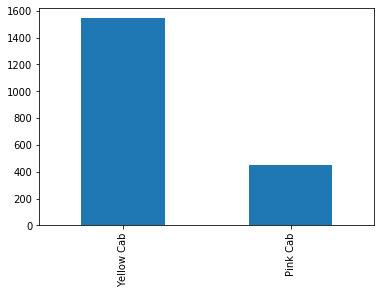

In [10]:
cab['Company'].value_counts().plot(kind='Bar')
plt.show()

In [11]:
cab['Company'].value_counts(normalize=True)*100

Yellow Cab    77.277277
Pink Cab      22.722723
Name: Company, dtype: float64

In [12]:
cab['City'].value_counts(normalize=True)*100

NEW YORK NY       23.123123
CHICAGO IL        20.920921
LOS ANGELES CA    15.365365
WASHINGTON DC      9.409409
BOSTON MA          7.257257
SAN DIEGO CA       6.106106
SEATTLE WA         3.853854
ATLANTA GA         2.802803
DALLAS TX          2.752753
SILICON VALLEY     2.452452
DENVER CO          1.101101
ORANGE COUNTY      1.001001
MIAMI FL           0.750751
AUSTIN TX          0.700701
SACRAMENTO CA      0.650651
PHOENIX AZ         0.600601
TUCSON AZ          0.450450
NASHVILLE TN       0.450450
PITTSBURGH PA      0.250250
Name: City, dtype: float64

In [13]:
cab['Cost of Trip'].groupby([cab['Company']]).count()

Company
Pink Cab       454
Yellow Cab    1544
Name: Cost of Trip, dtype: int64

In [14]:
cab['Date of Travel']=pd.to_datetime(cab['Date of Travel'],format='%m%d%y')
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1977-04-23,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1975-04-23,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1971-04-23,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1976-04-23,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1972-04-23,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
pd.crosstab(cab['Date of Travel'],cab['Company'])

Company,Pink Cab,Yellow Cab
Date of Travel,,
1971-04-23,41,140
1972-04-23,52,126
1973-04-23,4,21
1974-04-23,6,41
1975-04-23,23,86
1976-04-23,24,117
1977-04-23,21,90
1978-04-23,57,205
1979-04-23,67,188


# Reading the city data

In [16]:
city=pd.read_csv('City.csv')

In [17]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [18]:
city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


checking the variable data we have all categorical variables in the city data set

In [19]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


checking the size of the table

In [20]:
city.shape

(20, 3)

In [21]:
city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NASHVILLE TN,"698,371","14,978"
freq,1,1,1


In [22]:
city['Users'].groupby(city['Population']).value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x000000021A0EF390>>

# Transaction Id details

In [23]:
Tid=pd.read_csv('Transaction_ID.csv')

In [24]:
Tid.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [25]:
Tid.shape

(1999, 3)

the size of the data is (1999,3)

In [26]:
Tid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 3 columns):
Transaction ID    1999 non-null int64
Customer ID       1999 non-null int64
Payment_Mode      1999 non-null object
dtypes: int64(2), object(1)
memory usage: 46.9+ KB


checking the categorical and numerical variable data

In [27]:
Tid.corr()

,Transaction ID,Customer ID
Transaction ID,1.000000,0.081297
Customer ID,0.081297,1.000000


In [28]:
Tid['Customer ID'].nunique()

1919

In [29]:
Tid.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [30]:
Tid['Payment_Mode'].value_counts(normalize=True)*100

Card    58.229115
Cash    41.770885
Name: Payment_Mode, dtype: float64

# Reading the Customer_ID Data

In [31]:
cid=pd.read_csv('Customer_ID.csv')

In [32]:
cid.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [33]:
cid.shape

(49171, 4)

checking the size of the data

In [34]:
cid.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


statistical features of the customer data

In [35]:
cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [36]:
cid.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [37]:
cid['Gender'].value_counts(normalize=True)*100

Male      54.019646
Female    45.980354
Name: Gender, dtype: float64

In [38]:
cid['Customer ID'].value_counts().max()

1

checking if there are any duplicates 

In [39]:
cid.drop_duplicates(subset=['Customer ID'], inplace=True)


# Merging all the tables 

In [40]:
df=pd.merge(cid,Tid)

In [41]:
df.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,27703,Male,27,9237,10000012,Card
2,28712,Male,53,11242,10000013,Cash
3,28020,Male,23,23327,10000014,Cash
4,27182,Male,33,8536,10000015,Card


In [42]:
df.shape

(1999, 6)

In [43]:
df.max()

Customer ID              59965
Gender                    Male
Age                         65
Income (USD/Month)       34968
Transaction ID        10002009
Payment_Mode              Cash
dtype: object

In [44]:
df1=pd.merge(cab,city)

In [45]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,1977-04-23,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,1975-04-23,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,1971-04-23,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,1976-04-23,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,1972-04-23,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


# Final Data with all the tables which are merged

In [46]:
data=pd.merge(df,df1)

In [47]:
data.shape

(1558, 14)

We are left with 1558 peoples data after merging all the data

In [48]:
data['Date of Travel']=pd.to_datetime(data['Date of Travel'],format='%m%d%y')

In [49]:
data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,1977-04-23,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,27703,Male,27,9237,10000012,Card,1975-04-23,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,28712,Male,53,11242,10000013,Cash,1971-04-23,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,28020,Male,23,23327,10000014,Cash,1976-04-23,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,27182,Male,33,8536,10000015,Card,1972-04-23,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [50]:
data.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)', 'Transaction ID',
       'Payment_Mode', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

In [51]:
data['Gender'].value_counts()

Male    1558
Name: Gender, dtype: int64

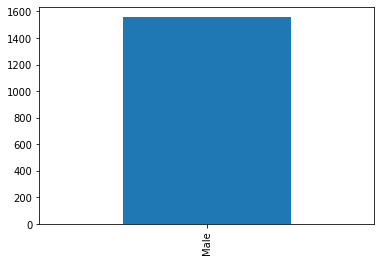

In [52]:
data['Gender'].value_counts().plot(kind='Bar')
plt.show()

After merging the data sets we see that the female data is missing and biased

In [53]:
data['Company'].value_counts(normalize=True)*100

Yellow Cab    70.860077
Pink Cab      29.139923
Name: Company, dtype: float64

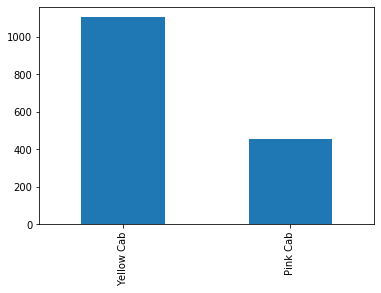

In [54]:
data['Company'].value_counts().plot(kind='Bar')
plt.show()

In [55]:
data['City'].value_counts()

CHICAGO IL        418
NEW YORK NY       253
LOS ANGELES CA    212
WASHINGTON DC     152
BOSTON MA         145
SAN DIEGO CA       99
ATLANTA GA         56
SEATTLE WA         55
DALLAS TX          40
SILICON VALLEY     37
ORANGE COUNTY      15
AUSTIN TX          14
DENVER CO          14
MIAMI FL           11
SACRAMENTO CA      10
PHOENIX AZ          9
TUCSON AZ           7
NASHVILLE TN        7
PITTSBURGH PA       4
Name: City, dtype: int64

In [56]:
data['Customer ID'].nunique()

1509

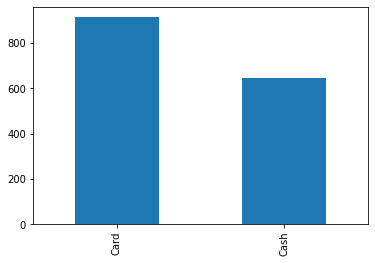

In [57]:
data['Payment_Mode'].value_counts().plot(kind='Bar')
plt.show()

In [58]:
data['Transaction ID'].nunique()

1558

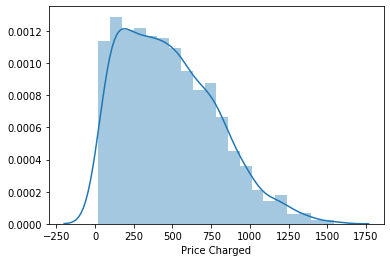

In [59]:
sns.distplot(data['Price Charged'])
plt.show()

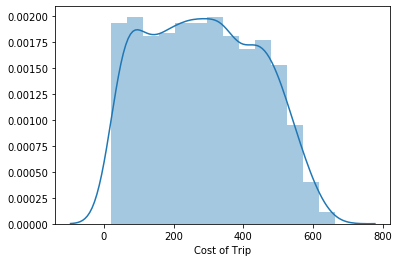

In [60]:
sns.distplot(data['Cost of Trip'])
plt.show()

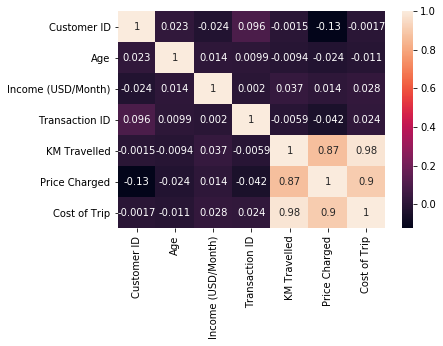

In [87]:
sns.heatmap(data.corr(),annot=True)
plt.show()

# cost of the trip and price charged ,KM Travelled and Price charged are highly correlated

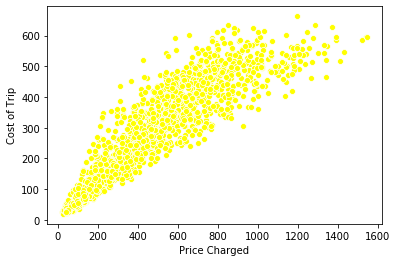

In [88]:
sns.scatterplot(data['Price Charged'],data['Cost of Trip'],color='Yellow')
plt.show()

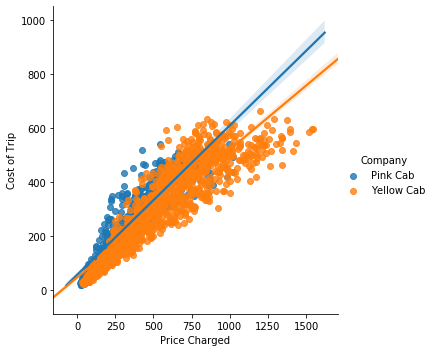

In [63]:
sns.lmplot(x='Price Charged',y='Cost of Trip',data=data,fit_reg=True,hue='Company')
plt.show()

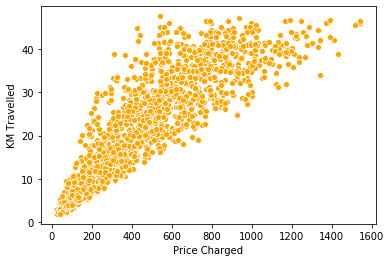

In [64]:
sns.scatterplot(data['Price Charged'],data['KM Travelled'],color='Orange')
plt.show()

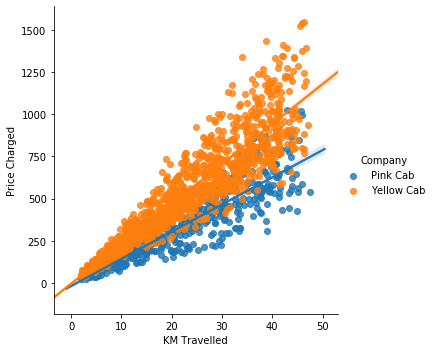

In [65]:
sns.lmplot(x='KM Travelled',y='Price Charged',data=data,fit_reg=True,hue='Company')
plt.show()

In [66]:
data['KM Travelled'].mean()

22.637599486521182

In [67]:
pd.crosstab(data['KM Travelled'],data['Company'])

Company,Pink Cab,Yellow Cab
KM Travelled,,
1.90,1,2
1.92,0,1
1.94,0,1
1.96,1,1
2.04,0,1
2.08,2,0
2.10,2,1
2.14,0,1
2.16,1,1


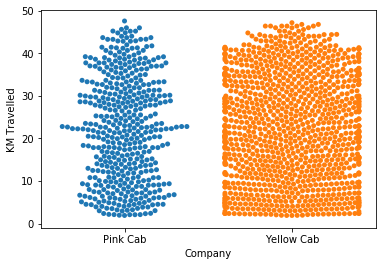

In [68]:
sns.swarmplot(x='Company',y='KM Travelled',data=data)
plt.show()

In [69]:
pd.crosstab(data['City'],data['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


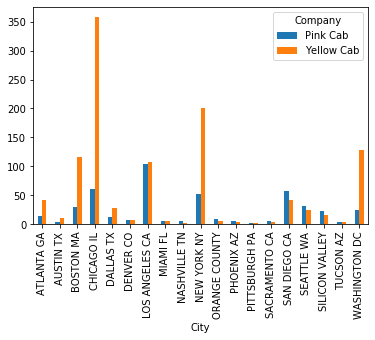

In [70]:
pd.crosstab(data['City'],data['Company']).plot(kind='Bar')
plt.show()

# maximum cab users at a particular time period

In [71]:
pd.crosstab(data['Date of Travel'],data['Company'])

Company,Pink Cab,Yellow Cab
Date of Travel,,
1971-04-23,41,140
1972-04-23,52,126
1973-04-23,4,21
1974-04-23,6,41
1975-04-23,23,86
1976-04-23,24,117
1977-04-23,21,90
1978-04-23,57,137
1979-04-23,67,104


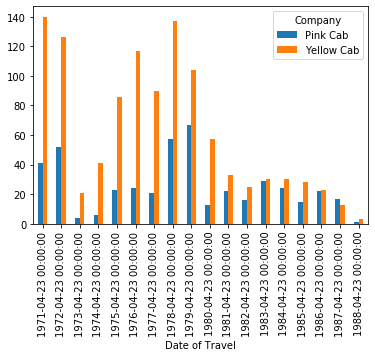

In [72]:
pd.crosstab(data['Date of Travel'],data['Company']).plot(kind='Bar')
plt.show()

The data given is for 18 years starting from 1971 to 1988 and it was on single day that is april 23
On this day Overall Yellow Cab had the maximum users for 17 years and Pink cab had slighlty maximum users than yellow cab in 1987

In [73]:
data[data['Date of Travel']=='1987-04-23'].head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
1104,29150,Male,18,13969,10001395,Card,1987-04-23,Pink Cab,ATLANTA GA,8.12,96.30,82.012,"814,885","24,701"
1106,35258,Male,33,19129,10001397,Card,1987-04-23,Pink Cab,AUSTIN TX,31.92,573.32,363.888,"698,371","14,978"
1119,57152,Male,30,4444,10001410,Card,1987-04-23,Pink Cab,BOSTON MA,4.52,42.10,51.076,"248,968","80,021"
1127,3242,Male,38,23148,10001417,Cash,1987-04-23,Pink Cab,CHICAGO IL,12.35,165.80,135.850,"1,955,130","164,468"
1132,5299,Male,64,24313,10001422,Card,1987-04-23,Pink Cab,CHICAGO IL,44.80,643.13,497.280,"1,955,130","164,468"


In [74]:
pd.crosstab(data['City'],data['Company'])

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,14,42
AUSTIN TX,4,10
BOSTON MA,29,116
CHICAGO IL,60,358
DALLAS TX,12,28
DENVER CO,7,7
LOS ANGELES CA,104,108
MIAMI FL,6,5
NASHVILLE TN,5,2


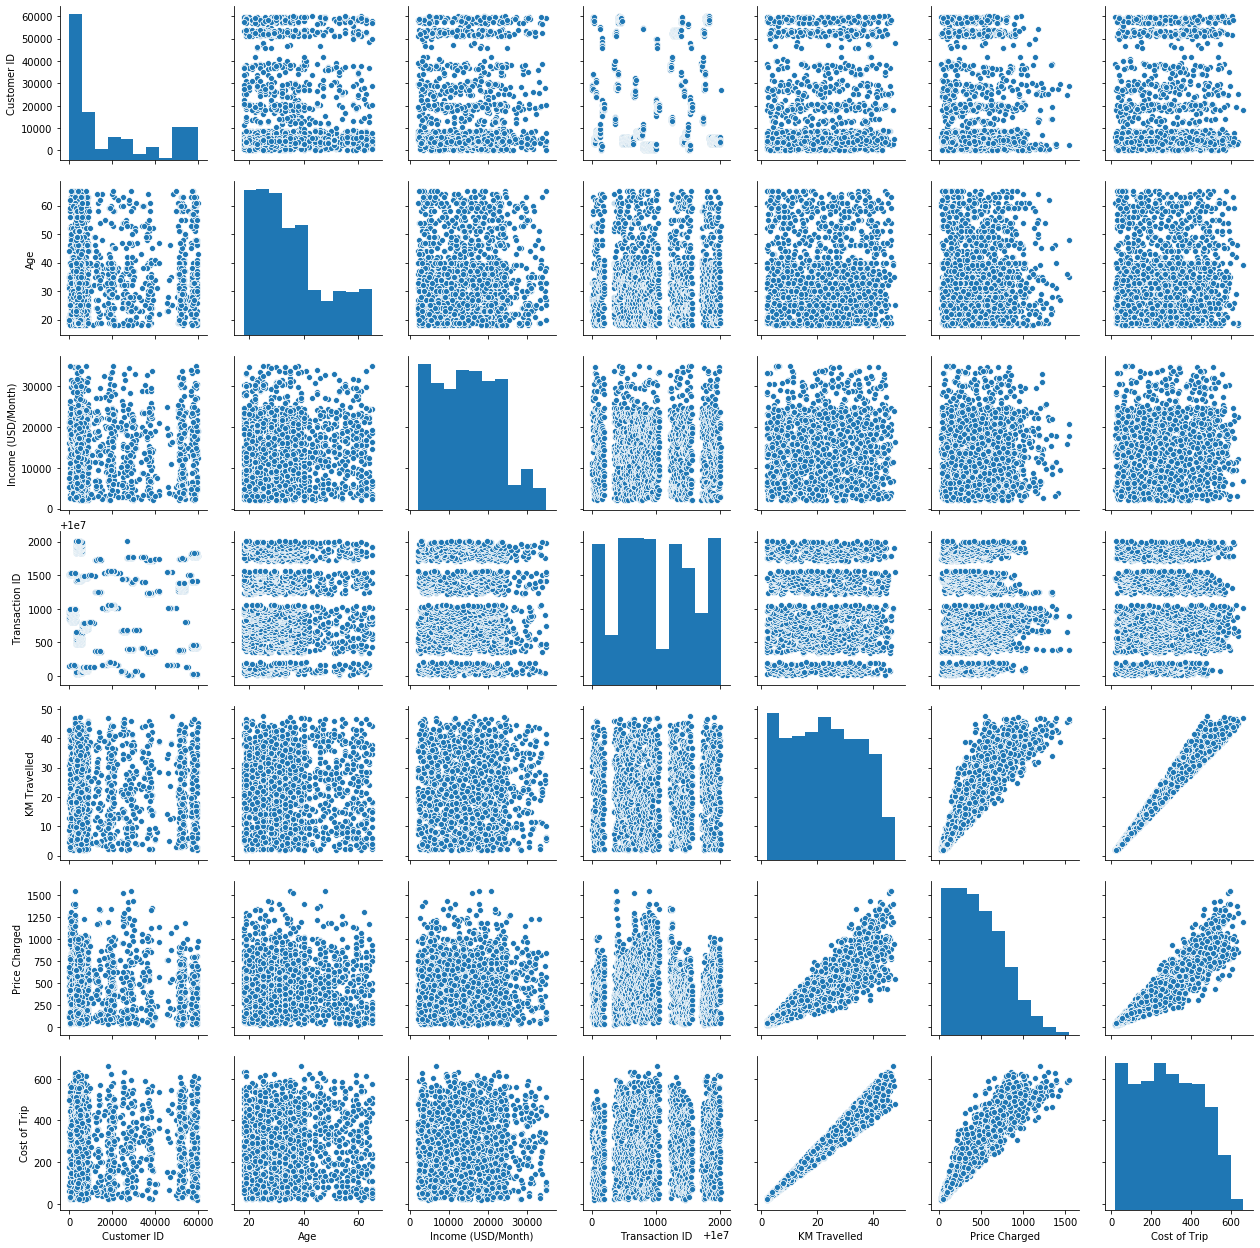

In [75]:
sns.pairplot(data)
plt.show()

# Does margin proportionally increase with increase in number of customers?

In [76]:
data.std()

Customer ID           20377.418986
Age                      12.668717
Income (USD/Month)     7953.293530
Transaction ID          583.334952
KM Travelled             12.278440
Price Charged           303.512623
Cost of Trip            157.573756
dtype: float64

Checking the standard deviation of the data

In [77]:
data.var()

Customer ID           4.152392e+08
Age                   1.604964e+02
Income (USD/Month)    6.325488e+07
Transaction ID        3.402797e+05
KM Travelled          1.507601e+02
Price Charged         9.211991e+04
Cost of Trip          2.482949e+04
dtype: float64

checking the variance of the data

In [78]:
data.mean()

Customer ID           1.944491e+04
Age                   3.488639e+01
Income (USD/Month)    1.487244e+04
Transaction ID        1.000101e+07
KM Travelled          2.263760e+01
Price Charged         4.781521e+02
Cost of Trip          2.846348e+02
dtype: float64

checking the mean of the data

# Hypothesis Testing

H0-mean1=mean2,
H1-mean1 != mean2

level of significance is 0.05

In [79]:
yellow_cab=data[data['Company']=='Yellow Cab']
pink_cab=data[data['Company']=='Pink Cab']

In [80]:
print((yellow_cab).mean())
print((pink_cab).mean())

Customer ID           1.937832e+04
Age                   3.462591e+01
Income (USD/Month)    1.472191e+04
Transaction ID        1.000108e+07
KM Travelled          2.274755e+01
Price Charged         5.339313e+02
Cost of Trip          3.003503e+02
dtype: float64
Customer ID           1.960683e+04
Age                   3.551982e+01
Income (USD/Month)    1.523848e+04
Transaction ID        1.000082e+07
KM Travelled          2.237022e+01
Price Charged         3.425130e+02
Cost of Trip          2.464194e+02
dtype: float64


In [81]:
print((yellow_cab).std())
print((pink_cab).std())

Customer ID           21335.310713
Age                      12.639736
Income (USD/Month)     7865.365944
Transaction ID          511.561878
KM Travelled             12.316043
Price Charged           315.745682
Cost of Trip            163.284935
dtype: float64
Customer ID           17855.813521
Age                      12.730638
Income (USD/Month)     8160.371820
Transaction ID          695.187501
KM Travelled             12.195898
Price Charged           218.762244
Cost of Trip            135.487597
dtype: float64


In [82]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power


In [83]:
t_statistic, p_value = ttest_1samp(yellow_cab.mean(),pink_cab.mean())

In [84]:
print(t_statistic, p_value)

Customer ID           0.990351
Age                   1.004057
Income (USD/Month)    0.993410
Transaction ID       -5.999802
KM Travelled          1.004066
Price Charged         1.003842
Cost of Trip          1.003909
dtype: float64 [0.36024478 0.3541107  0.35886837 0.0009647  0.35410661 0.35420627
 0.35417636]


In [85]:
print("p-value",p_value)

p-value [0.36024478 0.3541107  0.35886837 0.0009647  0.35410661 0.35420627
 0.35417636]


In [86]:
ttest,pval = ttest_ind(yellow_cab.mean(),pink_cab.mean())
print("p-value",pval)

p-value 0.9999868784322874


p value is greater than alpha so accept null hypothesis and there is evident support that margin proportionally increase with increase in number of customers

# Conclusion:

The data given is biased and it consists of only 14 days data so from the above analysis we can conclude that  comparing on both cabs investing on yellow cabs will give you good profits as it is performing well and pink cab might be a new starter as it is operating its services in very less places. 